In [10]:
# Cell 1: Install packages (if needed)
!pip install pandas matplotlib

In [12]:
# Cell 2: Create the database
import sqlite3
import pandas as pd

def create_sample_database():
    """Create a sample SQLite database with sales data"""
    
    # Connect to SQLite database (creates if doesn't exist)
    conn = sqlite3.connect('sales_data.db')
    cursor = conn.cursor()
    
    # Create sales table
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS sales (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            product TEXT NOT NULL,
            quantity INTEGER NOT NULL,
            price REAL NOT NULL,
            sale_date DATE
        )
    ''')
    
    # Insert sample data
    sample_data = [
        ('Laptop', 2, 899.99, '2024-01-15'),
        ('Mouse', 5, 25.50, '2024-01-15'),
        ('Laptop', 1, 899.99, '2024-01-16'),
        ('Keyboard', 3, 75.00, '2024-01-16'),
        ('Monitor', 1, 299.99, '2024-01-17'),
        ('Mouse', 2, 25.50, '2024-01-17'),
        ('Keyboard', 1, 75.00, '2024-01-18'),
        ('Monitor', 2, 299.99, '2024-01-18'),
        ('Laptop', 1, 899.99, '2024-01-19'),
        ('Mouse', 3, 25.50, '2024-01-19')
    ]
    
    cursor.executemany('''
        INSERT INTO sales (product, quantity, price, sale_date)
        VALUES (?, ?, ?, ?)
    ''', sample_data)
    
    # Commit changes and close connection
    conn.commit()
    conn.close()
    
    print("Sample database 'sales_data.db' created successfully!")

# Run the function
create_sample_database()

Sample database 'sales_data.db' created successfully!


🔗 Connecting to sales_data.db...
✅ Connected successfully!

📊 Running SQL Query: Total Sales by Product
SALES SUMMARY BY PRODUCT
 product  total_quantity  total_revenue
  Laptop               4        3599.96
 Monitor               3         899.97
Keyboard               4         300.00
   Mouse              10         255.00


📈 Running SQL Query: Overall Sales Summary
OVERALL SALES SUMMARY
Total Transactions: 10
Total Units Sold: 21
Total Revenue: $5054.93
Average Product Price: $352.64


📊 Creating visualizations...
✅ Chart saved as 'sales_analysis_chart.png'


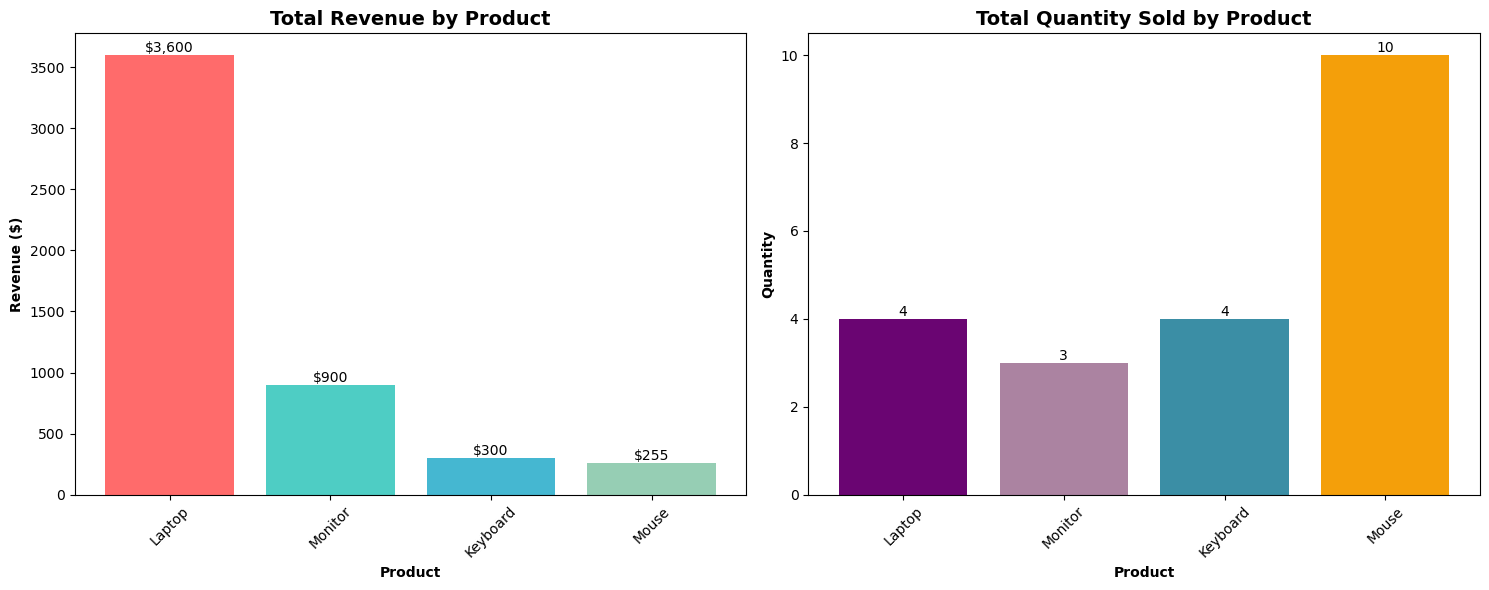

✅ Database connection closed.


In [14]:
# Cell 3: Analyze the data and create charts
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

def analyze_sales_data():
    """Main function to analyze sales data and create visualizations"""
    
    try:
        # 1. Connect to SQLite database
        print("🔗 Connecting to sales_data.db...")
        conn = sqlite3.connect('sales_data.db')
        print("✅ Connected successfully!\n")
        
        # 2. Run SQL Query 1: Total quantity and revenue by product
        print("📊 Running SQL Query: Total Sales by Product")
        query1 = """
        SELECT 
            product,
            SUM(quantity) AS total_quantity,
            SUM(quantity * price) AS total_revenue
        FROM sales
        GROUP BY product
        ORDER BY total_revenue DESC
        """
        
        df_sales = pd.read_sql_query(query1, conn)
        
        # 3. Display results using print
        print("=" * 50)
        print("SALES SUMMARY BY PRODUCT")
        print("=" * 50)
        print(df_sales.to_string(index=False))
        print("\n")
        
        # 4. Run SQL Query 2: Overall summary
        print("📈 Running SQL Query: Overall Sales Summary")
        query2 = """
        SELECT 
            COUNT(*) AS total_transactions,
            SUM(quantity) AS total_units_sold,
            SUM(quantity * price) AS total_revenue,
            AVG(price) AS average_product_price
        FROM sales
        """
        
        df_summary = pd.read_sql_query(query2, conn)
        
        print("OVERALL SALES SUMMARY")
        print("=" * 30)
        print(f"Total Transactions: {df_summary['total_transactions'].iloc[0]}")
        print(f"Total Units Sold: {df_summary['total_units_sold'].iloc[0]}")
        print(f"Total Revenue: ${df_summary['total_revenue'].iloc[0]:.2f}")
        print(f"Average Product Price: ${df_summary['average_product_price'].iloc[0]:.2f}")
        print("\n")
        
        # 5. Create visualizations
        print("📊 Creating visualizations...")
        
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar chart for revenue
        bars1 = ax1.bar(df_sales['product'], df_sales['total_revenue'], 
                       color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
        ax1.set_title('Total Revenue by Product', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Product', fontweight='bold')
        ax1.set_ylabel('Revenue ($)', fontweight='bold')
        ax1.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}',
                    ha='center', va='bottom')
        
        # Bar chart for quantity
        bars2 = ax2.bar(df_sales['product'], df_sales['total_quantity'],
                       color=['#6A0572', '#AB83A1', '#3B8EA5', '#F49F0A', '#EF476F'])
        ax2.set_title('Total Quantity Sold by Product', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Product', fontweight='bold')
        ax2.set_ylabel('Quantity', fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}',
                    ha='center', va='bottom')
        
        plt.tight_layout()
        
        # Save the chart
        plt.savefig('sales_analysis_chart.png', dpi=300, bbox_inches='tight')
        print("✅ Chart saved as 'sales_analysis_chart.png'")
        
        # Display the chart
        plt.show()
        
        # 6. Close database connection
        conn.close()
        print("✅ Database connection closed.")
        
    except sqlite3.Error as e:
        print(f"❌ Database error: {e}")
    except Exception as e:
        print(f"❌ An error occurred: {e}")

# Run the analysis
analyze_sales_data()